# **Analysing Machine Learning Models for Potholes Detection**

Author: Dany Pham

## **Abstract**
Potholes are a major problem on roads, causing vehicle damage and accidents. To address this issue, a machine learning model could be developed to detect potholes and determine the best route to avoid them. This project aims to analyze different machine learning models to detect potholes using a single frame. The project uses a dataset of South African streets, with 70% of the data used for training, 10% for validation and 20% for testing. A logistic regression model and an MLP model was be trained. It was found that an MLP machine learning model could yield similar results to a CNN without the additional hyperparameters.

## **Introduction**

Detecting potholes using images could help minimize vehicle damage, accidents, and allow cyclists to avoid high-risk roads, potentially saving lives. This project will aim to explore the uses of various machine learning model for binary classsification to detect wheter or not  there are potholes in an image. Two solutions can be found for the same Kaggle dataset that this project uses. Both proposed solution uses FastAI's pre-trained AlexNet CNN Model [1]. Although CNN are very good at learning hierarchal and local patterns, multiple other solutions can be analysed. For example, logistic regression and SVM are specially made for classification. SVMs, in particular, were developed for binary classification since the goal is to find a hyperplane that can separate two classes of data. However, after manually prototyping SVMs for this problem, it was found that the time complexity was too high and developing an good SVM was time consuming. Even in the case of casting data in a higher-dimension, training was time consuming. Due to choosing optimal kernel, tuning hyperparameters and time complexity, SVM was not chosen for analysis due to time constraints. Logistic Regression was instead chosen since it was also made for classification and it required minimal hyperparameter tuning using scikit-learn L-BFGS solver. Also, MLPs using the sigmoid function will be analysed for this project since MLPs are powerful to approximate functions that may be able to represent a model that solve the problem statement. Dropout will be used as a regularization technique and ReLu will be used as activation functions. It is interesting to contrast existing solutions (AlexNet CNN) with a custom MLP. From this experiment, it was found that MLPs can achieve good results (i.e., 0.86 F1 Score on testing data) without the additional hyperparameters that comes with CNNs. As for logistic regression, an optimal model was able to attain 0.79 F1 score on testing data which is worse than using MLPs or CNNs.

## **Methodology**

For simplicity, images where grayscaled and down-scaled so that all the data can fit the GPU memory or RAM. This also made training the model faster since each images contain less information. It was found that normalizing data using scikit-learn StandardScaler enabled models to converge to a solution faster as it transform input features to operate at a similar scale (i.e., low mean and variance) and the dataset varied a lot in scale (e.g., some images had trees, house or even people). Indeed, scikit-learn LogisticRegression with L-BFGS solver was not able to converge with 1500 iterations prior to data normalization. With normalization, 500 iterations was enough to find a solution.

The machine learning model for analysis where chosen based on practicality (i.e., performance, runtime complexity and ease of hyperparameter tuning). The analysed models were meant to experiment with simple models for binary classification for pothole detection as opposed to using state of the art models like AlexNet CNN. Another important aspect of the models to be analysed in this project is for the models to be able to detect potholes from an image. Among other solutions, this can be achieved by models that can do binary classification with supervised learning. For example, a label of 0 could represent an image with no potholes and a label of 1 could represent an image containing a pothole. Then, the goal is to find the best model that satisfy the aforementionned criteria.

The best machine learning in this experiment will have the highest F1 score. F1 score is used here because the train, test and validation are imbalanced. Furthermore, neither precision and recall is more important than the other in the problem statement. Only accuracy on imbalanced data is the concern. F1 score can help with that as it combines both precision and recall.

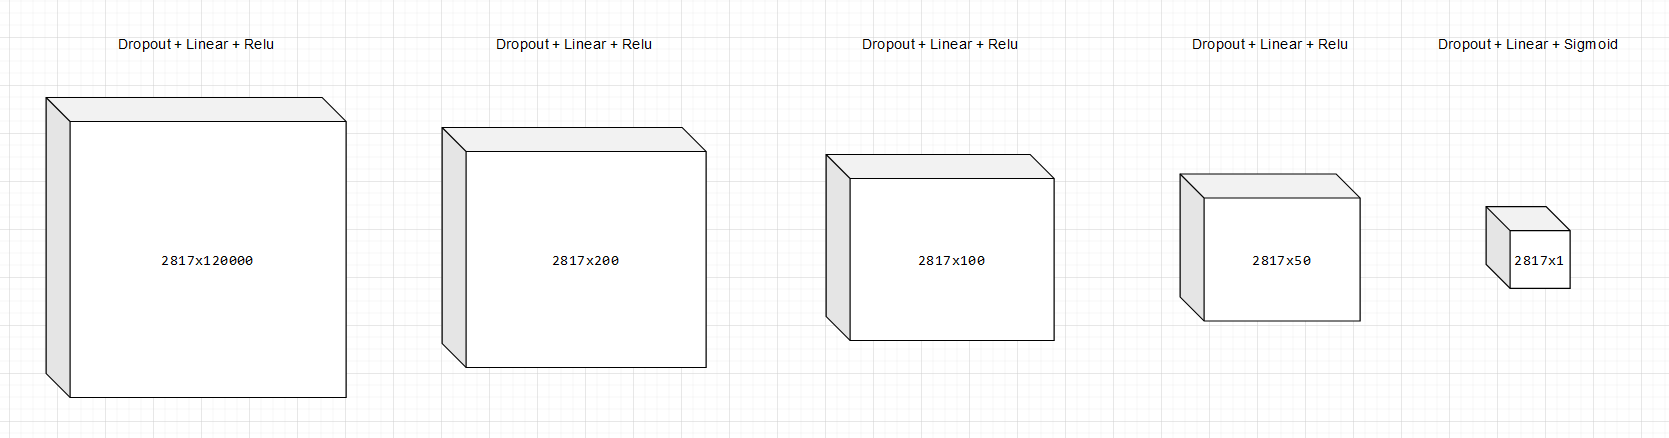

Figure 1: Best machine learning model achieved during training that the experiment could produce

The best machine learning model achieved in this experiment was an MLP with 3 hidden layers using ReLu as an activation function and dropout as a regularization technique trained on 2817x300x400 greyscaled images. The final prediction is passed through the sigmoid function which yields a label prediction 1 (contains potholes) or 0 (does not contain pothole) for every images.

## **Experimental Setup**

### **Dataset**

The project will use a dataset of South African streets [1], with 70% of the data used for training (2817 images), 10% for validation (403 images) and 20% for testing (806 images). The dataset commprises of RGB images of streets labeled with a 1 if they contain a pothole and 0 otherwise. The images are from the point of view of a moving car. The images contains noise such as trees, houses, grass and people that are not relevant to pothole detection. Pre-processing of the images was discussed in methodology.

### **Hyperparameter Tuning**
For logistic regression, scikit-learn L-BFGS solver was used because of it's practicality and simplicity (i.e., yielded decent results and consisted of one hyperparameter which is regularization strength). This allowed for relatively fast hyperparameter tuning on the validation set. Random guesses narrowed candidate hyperparameters to a few, grid search was use to find the optimal one. For instance, randomly using a regularization strength of 0.01 made the model overfit since the F1 score was perfect on the training set but performed poorly on unseen data. Regularization strength had to be increased. In scikit-learn, this corresponded to lowering the hyperparameter C (i.e., the inverse of the regularization strength). The optimal C hyperparameter was found to be 0.00001 using grid search.

For MLP, manual hyperparameter tuning was used (i.e., "undergraduate student descent" a less refined version of the "graduate student descent", a humorous term from an unknown author found in Concordia COMP 432 Week 7 tutorial lab). SGD was used to update the MLP model weights as to not iterate through all the data for every epoch. This accelerated training time while yielding good results. The learning rate and momentum were manually tuned to avoid the loss oscillation during SGD.

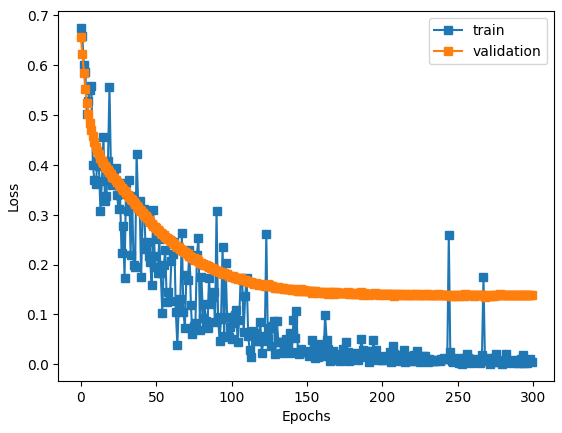

Figure 2: Train and validation loss during SGD for an MLP with learning rate of 0.0001, momentum of 0.9, 300 epoch, and batch size of 100 wihtout dropout

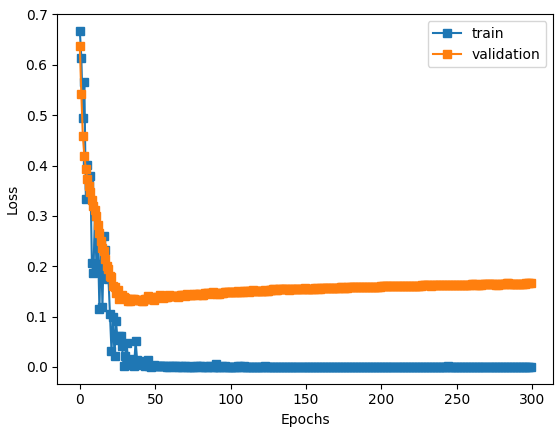

Figure 3: Train and validation loss during SGD for an MLP with learning rate of 0.0001, momentum of 0.99, 300 epoch, and batch size of 100 without dropout

It was found to be too difficult to regularize with the hyperparameters showed in figure 2 and 3. To resolve the issue, batch size was increased to 1800, making SGD closer to a standard gradient descent. This should help the model learn something that is closer to what the training data is trying to "tell". The number of epoch was increased to 500 to see the loss trend.

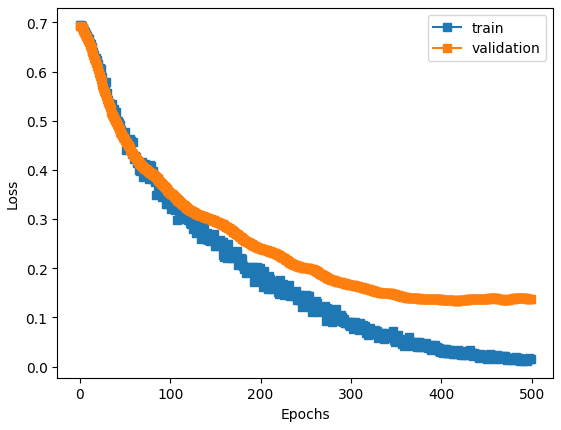

Figure 4: Train and validation loss during SGD for an MLP with learning rate of 0.0001, momentum of 0.99, 500 epoch, and batch size of 1800 without dropout

Using the validation set, regularization was done using dropout. It was found manually that dropout with a probability p of 50% of dropping a neuron worked well to counter overfitting. The dropout was applied to the inputs, outputs and all hidden layers. PyTorch turns dropout off at evaluation time and multiply the output during training by $\dfrac{1}{1-p}$ [2]. Nothing further is needed to compensate the effect of dropout at test time [3]. Number of epoch was decreased back to 300 for manual early stopping.

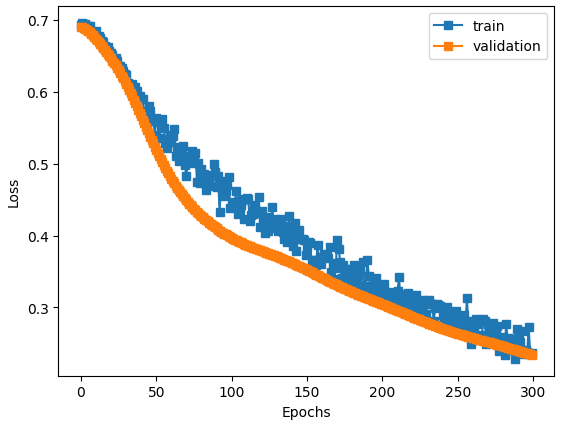

Figure 5: Train and validation loss during SGD for an MLP with learning rate of 0.0001, momentum of 0.99, 300 epoch, and batch size of 1800 with dropout where p = 0.5

The number of neurons was chosen so that it does not use too much GPU memory. However, the number of neurons used for each hidden layer did not seem to have a noticeable effect on the loss during SGD when training the model. This is expected since increasing the neurons is mostly beneficial to get a better approximation of a function representing a model as per the universal approximation theorem [4]. If a certain amount of neurons gives a "good enough" approximation already, increasing or decreasing the neurons by the hundreds will not have noticeable effect on this MLP in particular. 200, 100, 50 neurons were used respectively for the model's 3 hidden layer. Increasing hidden layers limited the validation set to be regularized only to a validation loss worse then figure 5. This could be because the model is learning a different pattern, further research would need to be done to verify this statement. Decreasing hidden layers was not experimented in this project, making the latter manipulation effect inconclusive. Ultimately, figure 5 illustrates the hyperparameters that gave the most satisfactory results on the validation set and were used to build the final model for this project.

## **Experimental Results**


#### **Importing Libraries**

In [1]:
# Python Libraries
%matplotlib inline
import numpy as np                    # For data manipulation
import matplotlib.pyplot as plt       # For plotting
import matplotlib.image as img        # For converting jpg to matrices
import torch                          # For training machine learning models
import sklearn                        # For training machine learning models and calculate F1-score and accuracy
import sklearn.preprocessing          # For StandardScaler
import sklearn.linear_model           # For LogisticRegression
import sklearn.neural_network         # For MLPClassifier
import cv2                            # OpenCV to convert to grayscale
import os                             # Manipulate directories

#### **Get the Dataset**

In [ ]:
# Kaggle Dataset (Source: https://www.kaggle.com/datasets/salimhammadi07/miia-pothole-image-classification-challenge)
# I put everything in dropbox for easy access via wget
# If that does not work, put the downloaded archive.zip from the Kaggle dataset in the the current directory or the content directory on collab.
!wget -O archive.zip "https://www.dropbox.com/s/28ljbbnkvwntfio/archive.zip?dl=0"

# Unzip archive.zip zip folder fetched from the public google drive that contains the Kaggle dataset
# Should wait until we can see all JPG images in /content/kaggle/all_data/all_data/
if not os.path.exists('archive.zip'):
  raise Exception("Kaggle's dataset as archive.zip missing in current directory")
if os.path.exists('all_data'):
  raise Exception("Kaggle dataset already unzipped on path /all_data")
!unzip archive.zip

#### **Utility Functions**

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def get_dataset(convert_to_grayscale=True, downscale = True):
    """Returns train, validation and test set (70%, 10%, 20% of total dataset respectively) as a numpy array.
        6 numpy array are returned with shapes (2817, 300, 400), (2817,), (403, 300, 400),
        (403,), (806, 300, 400), (806,) respectively.

    Arguments
    ---------
    convert_to_grayscale : bool
        Indicates wheter or not to convert image to greyscale.
    downscale : bool
        Indicates wheter or not to downscale the pothole images.

    Example
    -------
    >>> X_train, y_train, X_test, y_test, X_validation, y_validation = get_dataset(True)
    >>> X_train.shape
    (2817, 300, 400)
    """
    # Contains all image ids and their label
    dataset_imageid_to_label_data = np.loadtxt(
        "train_ids_labels.csv",    
        dtype=np.str_ ,
        delimiter=",",
        skiprows=1)

    X, y = [], []

    for id, label in dataset_imageid_to_label_data:
      file_name = "all_data//all_data//" + id + ".JPG"
      image_matrix = cv2.cvtColor(img.imread(file_name), cv2.COLOR_RGB2GRAY) if convert_to_grayscale else img.imread(file_name)
      if downscale:
          image_matrix = cv2.resize(image_matrix, (0,0), fx=0.5, fy=0.5)
      X.append(image_matrix)
      y.append(int(label))

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X, y, train_size=0.8, test_size=0.2, random_state=0)
    
    X_train, X_validation, y_train, y_validation = sklearn.model_selection.train_test_split(
        X_train, y_train, train_size=0.875, test_size=0.125, random_state=0) 

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), np.array(X_validation), np.array(y_validation)


def plot_matrix_image_greyscale(X, y, num_display=4):
    """This function displays greyscaled images on the screen (must be greyscaled).
       Nothing is returned.

    Arguments
    ---------
    X : numpy array
        Input features of shape (number_of_images, width, length)
        Where width = 300 and length = 400.
    y : numpy array
        Labels for X of shape (number_of_images,).
    num_display : int
        Indicates how many images to display.

    Example
    -------
    >>> X_train, y_train, X_test, y_test, X_validation, y_validation = get_dataset(True)
    >>> X_train.shape
    (2817, 300, 400)
    >>> plot_matrix_image_greyscale(X_train, y_train, num_display=4)  # display 4 images on the screen
    """
    k, m, n = X.shape
    V, labels = X[:num_display], y[:num_display]     
    vmin, vmax = np.percentile(V, [0.1, 99.9])                    
    for ith in range(num_display):
        plt.figure(figsize = (m/30,n/30))
        plt.colorbar(plt.imshow(V[ith], vmin=vmin, vmax=vmax, cmap=plt.get_cmap('gray')), shrink=n/900)
        if labels[ith] == 0:
            plt.title("Does Not Contain Potholes", fontsize=20)
        else:
            plt.title("Contains Potholes", fontsize=20)


def display_confusion_matrix(y_test, predictions, title):
    """This function displays a confusion matrix given label and predicted labels
       Taken from scikit-learn documentation and stack overflow
       Source 1: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
       Source 2: https://stackoverflow.com/questions/66483409/adjust-size-of-confusionmatrixdisplay-scikitlearn
       No return value.

    Arguments
    ---------
    y_test : numpy array
        Label array of shape (number_of_images,).
    predictions : numpy array
        Label array of shape (number_of_images,).
    title : str
        Title of the confusion matrix to be displayed

    Example
    -------
    >>> X_train, y_train, X_test, y_test, X_validation, y_validation = get_dataset(True)
    >>> X_train.shape
    (2817, 300, 400)
    >>> y_train.shape
    (2817,)
    >>> mlp = MLP()
    >>> y_pred = MLP(X_train.reshape(-1,120000))  # predict using a model
    >>> y_pred.shape
    (2817,)
    >>> display_confusion_matrix(y_train, y_train_pred, "MLP confusion matrix with training data")
    # confusion matrix is displayed on screen
    """
  
    cm = confusion_matrix(y_test, predictions, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(ax = ax)
    plt.title(title)
    plt.show()

def bce_loss(y, y_pred):
    """Returns binary cross entropy loss, a float is returned

    Arguments
    ---------
    y : numpy array
        Label array of shape (number_of_images,).
    y_pred : numpy array
        Prediction labels array of shape (number_of_images,).

    Example
    -------
    >>> X_train, y_train, X_test, y_test, X_validation, y_validation = get_dataset(True)
    >>> X_train.shape
    (2817, 300, 400)
    >>> y_train.shape
    (2817,)
    >>> mlp = MLP()
    >>> y_pred = MLP(X_train.reshape(-1,120000))  # predict using a model
    >>> y_pred.shape
    (2817,)
    >>> bce_loss(y_train, y_pred)  # BCE loss of train prediction
    1.5140 ...
    """
    return log_loss(y, y_pred, normalize=True)

#### **Set Up Datasets (1 min.)**

training set shape:  (2817, 300, 400)
validation set shape:  (403, 300, 400)
test set shape:  (806, 300, 400)


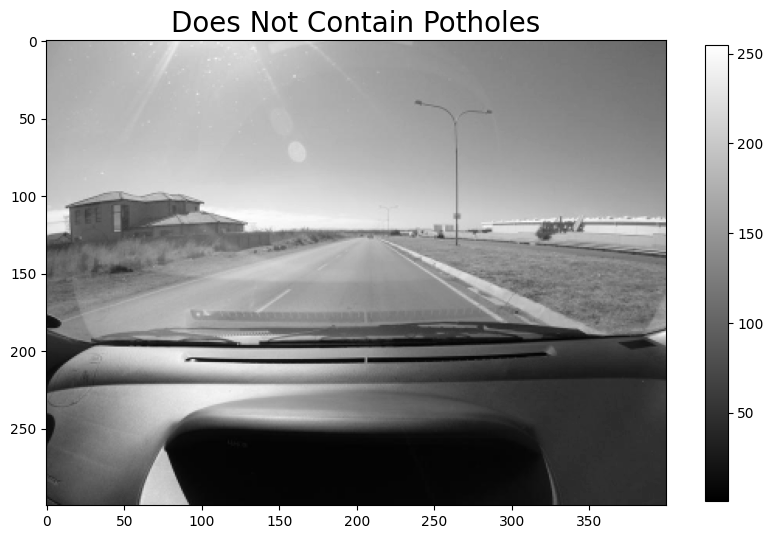

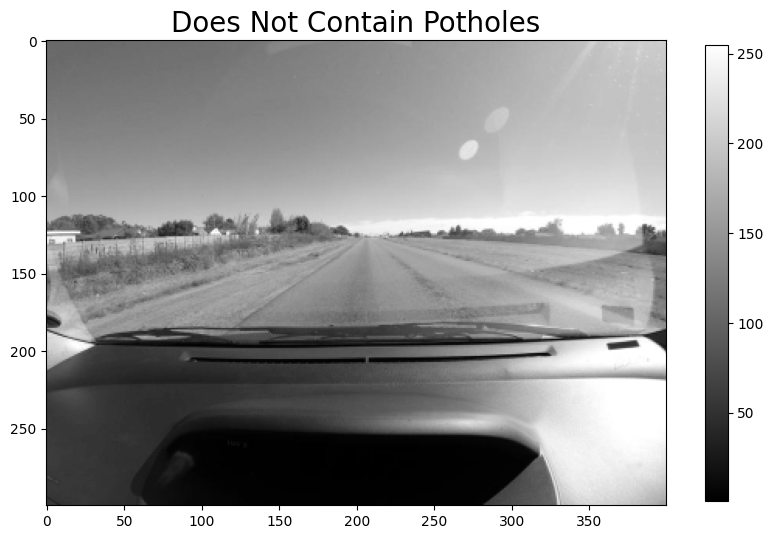

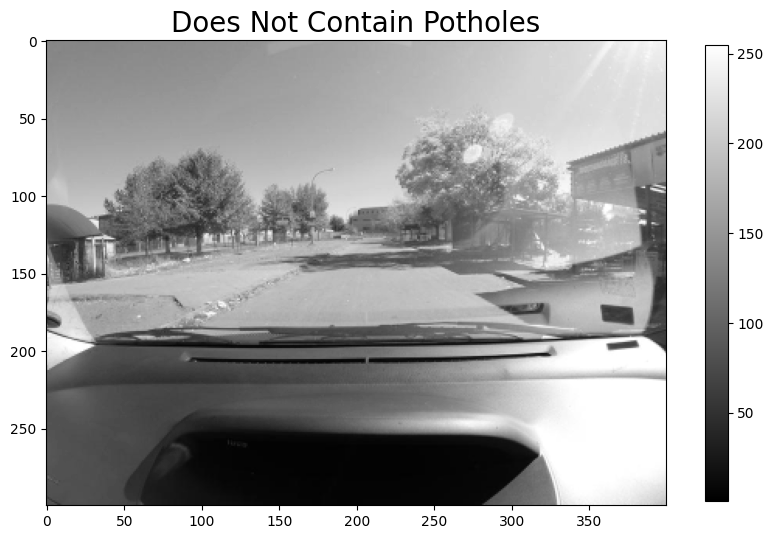

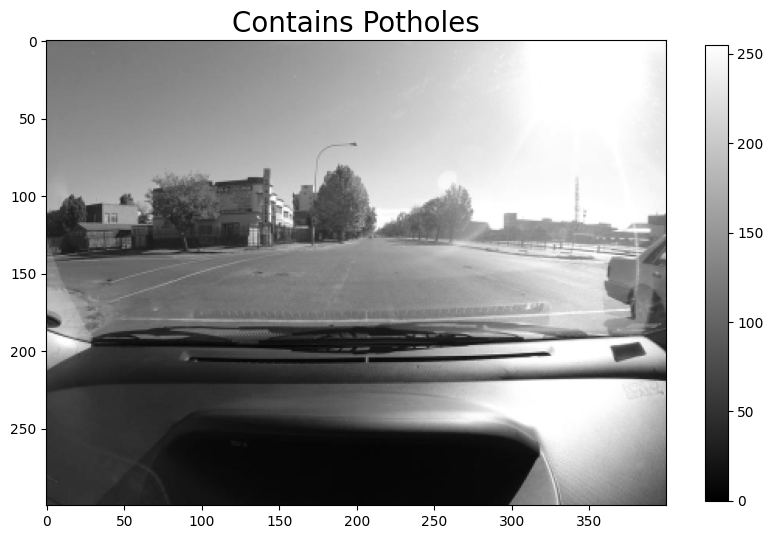

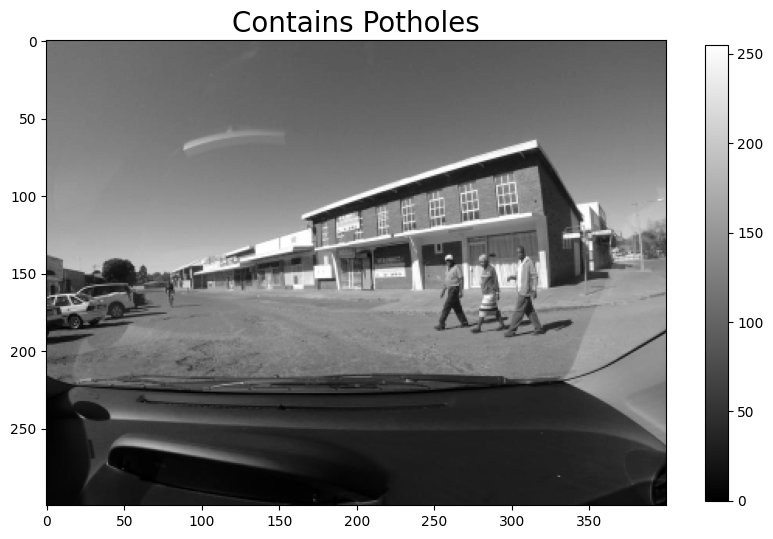

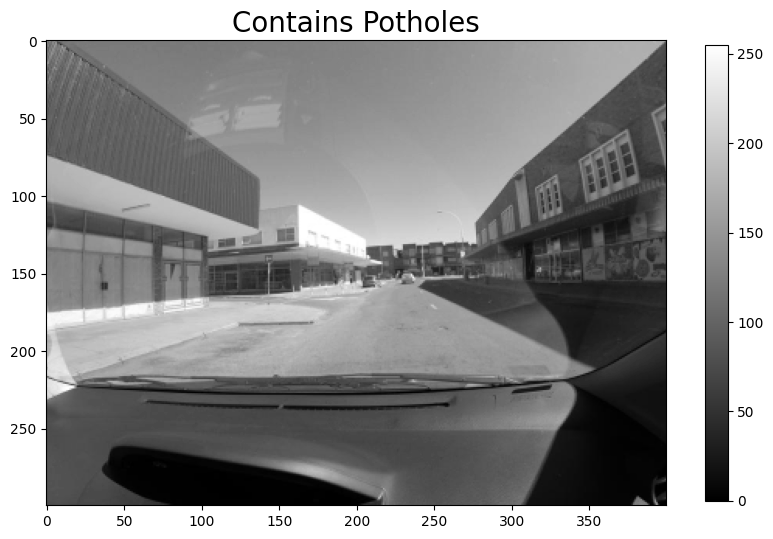

In [6]:
X_train, y_train, X_test, y_test, X_validation, y_validation = get_dataset(True)   

image_dimension0, image_dimension1 = X_train.shape[1], X_train.shape[2]
print("training set shape: ", X_train.shape)
print("validation set shape: ", X_validation.shape)
print("test set shape: ", X_test.shape)

plot_matrix_image_greyscale(X_train[np.isin(y_train, [0])], y_train[np.isin(y_train, [0])], 3);
plot_matrix_image_greyscale(X_train[np.isin(y_train, [1])], y_train[np.isin(y_train, [1])], 3);

#### **Normalize data (10 sec.)**

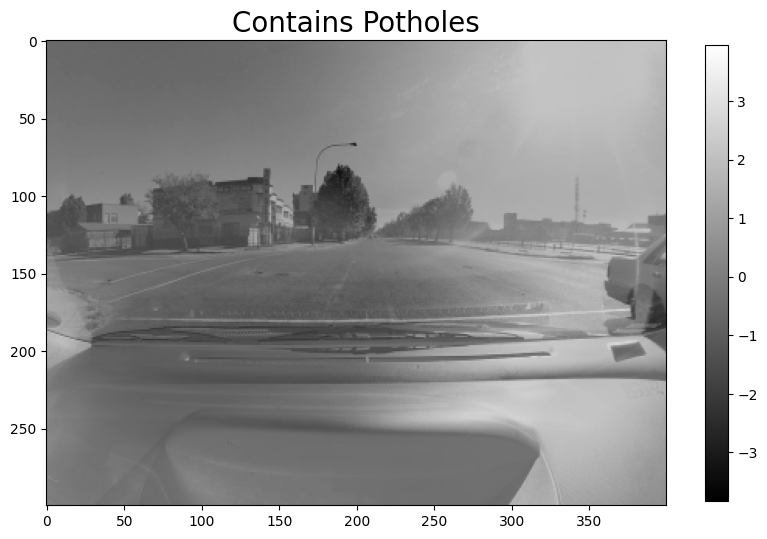

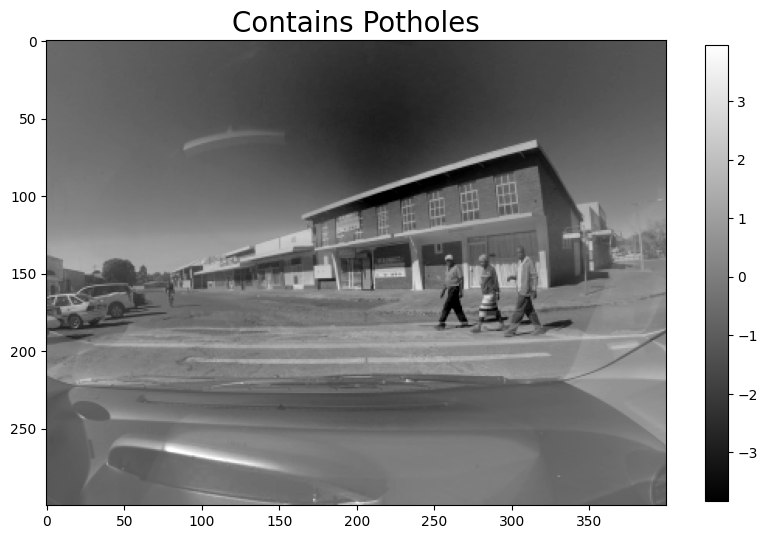

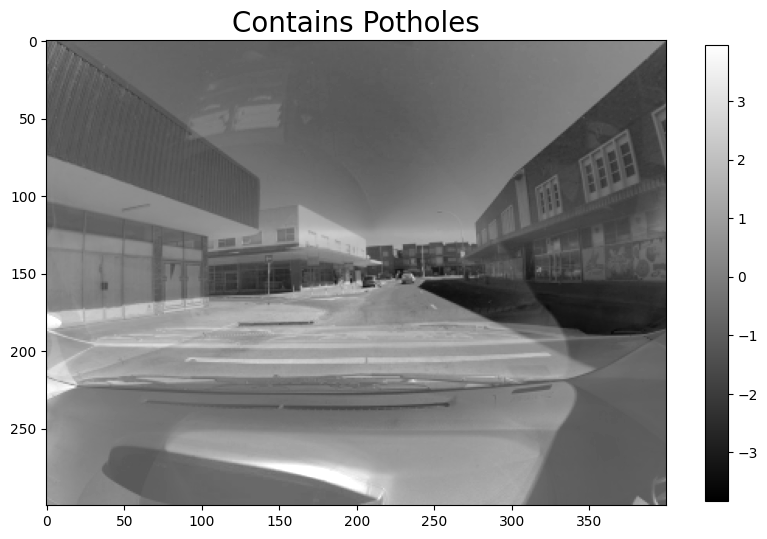

In [7]:
scaler = sklearn.preprocessing.StandardScaler().fit(X_train.reshape(-1,image_dimension0*image_dimension1))
X_train = scaler.transform(X_train.reshape(-1,image_dimension0*image_dimension1))
X_test = scaler.transform(X_test.reshape(-1,image_dimension0*image_dimension1))
X_validation = scaler.transform(X_validation.reshape(-1,image_dimension0*image_dimension1))

plot_matrix_image_greyscale(
    X_train.reshape(-1,image_dimension0,image_dimension1),
    y_train,
    3);

#### **Logistic Regression using scikit-learn**

##### **Grid Search for best Logistic Regression Regularization Strength (6 min.)**

It was found that C=0.00001 is the first optimal hyperparameter in the search grid. Indeed, training performance and validation are the same (i.e., F1 score of 0.81) and the loss is similar compared to other options)

In [ ]:
param_grid = {
    "C": [0.000001, 0.00001, 0.0001, 0.001]
}

for c in param_grid["C"]:
    logistic_regression_model = LogisticRegression(C=c, random_state=0, max_iter=500, verbose=True)
    logistic_regression_model.fit(X_train, y_train)
    train_loss, validation_loss = bce_loss(y_train, logistic_regression_model.predict(X_train)), bce_loss(y_validation, logistic_regression_model.predict(X_validation))
    f1_score_train, f1_score_validation = f1_score(y_train, logistic_regression_model.predict(X_train)), f1_score(y_validation, logistic_regression_model.predict(X_validation))
    print("train loss: %.5f validation loss : %.5f f1_score_train : %.2f f1_score_validation : %.2f for C=%.7f" % (train_loss, validation_loss, f1_score_train, f1_score_validation, c))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s finished


train loss: 0.00264 validation loss : 0.01842 f1_score_train : 0.69 f1_score_validation : 0.69 for C=0.0000010


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.0s finished


train loss: 0.00174 validation loss : 0.01243 f1_score_train : 0.81 f1_score_validation : 0.81 for C=0.0000100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished


train loss: 0.00067 validation loss : 0.00954 f1_score_train : 0.93 f1_score_validation : 0.86 for C=0.0001000


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min finished


train loss: 0.00002 validation loss : 0.00843 f1_score_train : 1.00 f1_score_validation : 0.88 for C=0.0010000


##### **Training The Model** (1 min.)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.3s finished


---------------  Confusion Matrix (Training and Validation set) ---------------


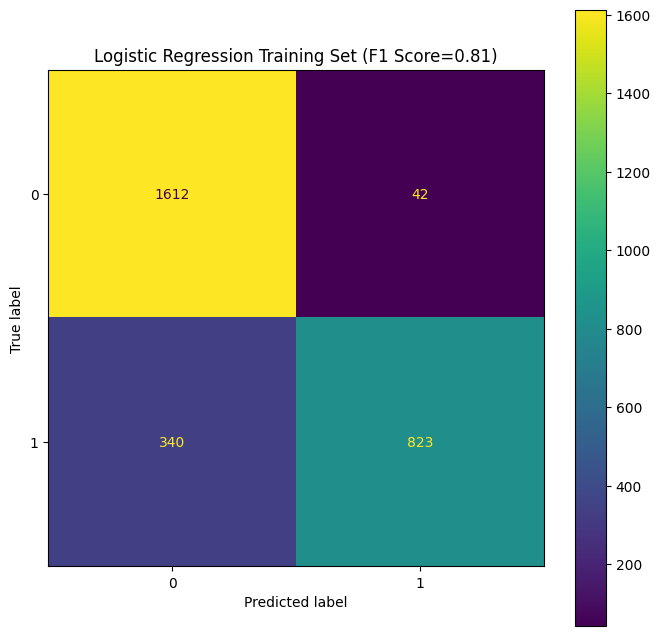

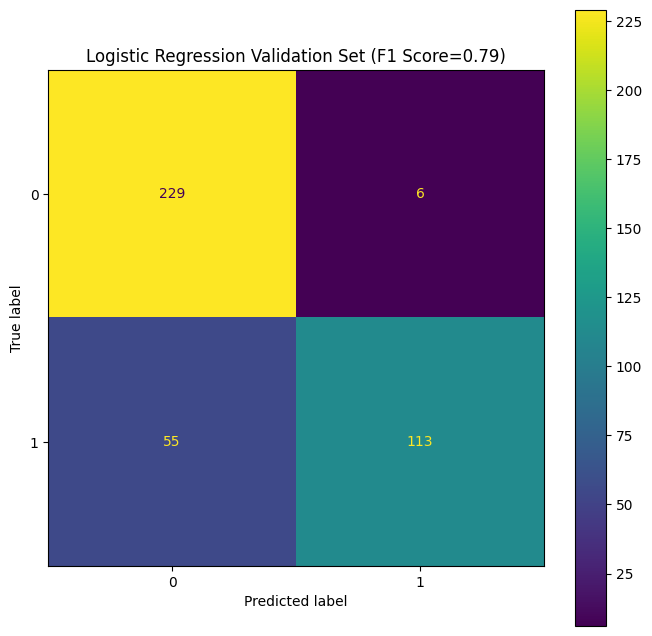

In [8]:
# Train the model
logistic_regression_model = LogisticRegression(C=0.00001, random_state=0, max_iter=1000, verbose=True).fit(X_train, y_train)

# Tuning using validation set
predictions_train = logistic_regression_model.predict(X_train)
predictions_validation = logistic_regression_model.predict(X_validation)
print("---------------  Confusion Matrix (Training and Validation set) ---------------")
display_confusion_matrix(y_train, predictions_train, "Logistic Regression Training Set (F1 Score=%.2f)" % f1_score(y_train, predictions_train))
display_confusion_matrix(y_validation, predictions_validation, "Logistic Regression Validation Set (F1 Score=%.2f)" % f1_score(y_validation, predictions_validation))

##### **Logistic Regression Results**

---------------  Confusion Matrix (Training and Test set) ---------------


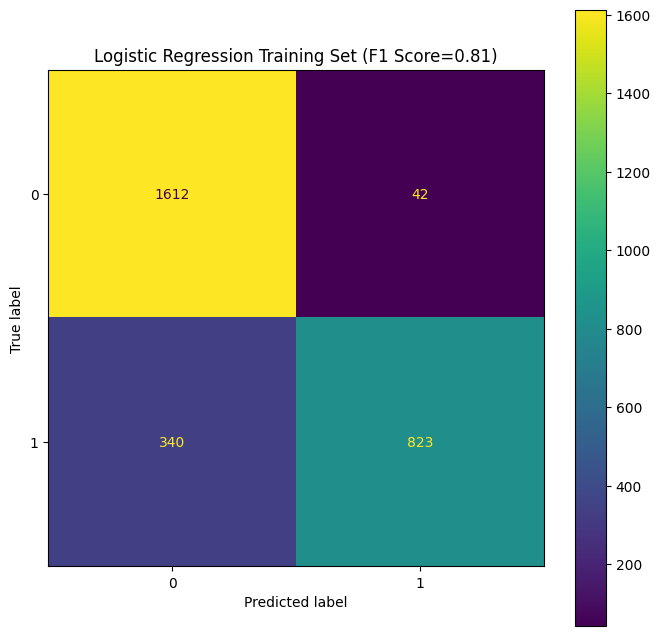

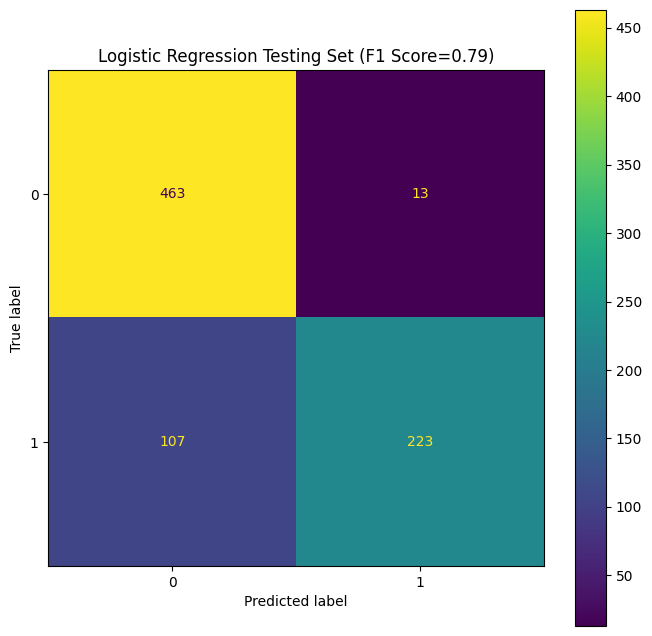

In [9]:
# Evaluate the model
predictions_train = logistic_regression_model.predict(X_train)
predictions_test = logistic_regression_model.predict(X_test)
print("---------------  Confusion Matrix (Training and Test set) ---------------")
display_confusion_matrix(y_train, predictions_train, "Logistic Regression Training Set (F1 Score=%.2f)" % f1_score(y_train, predictions_train))
display_confusion_matrix(y_test, predictions_test, "Logistic Regression Testing Set (F1 Score=%.2f)" % f1_score(y_test, predictions_test))

#### **MLP using PyTorch**

##### **Defining the model**

In [10]:
# For reproducibility
torch.manual_seed(0)

class MLP(torch.nn.Module):
    """This function implements an MLP with 3 hidden layers and dropout regularization.

    Arguments
    ---------
    dropout_rate : int
      Probability of a neuron to be dropped

    Example
    -------
    >>> X_trn.shape #2000 images with 120 000 features
    (2000, 120000)
    >>> y_trn.train
    (2000,)         #2000 labels
    >>> mlp = MLP(0.4)  # dropout rate of 0.4
    ...
    >>> loss = torch.nn.BCELoss();
    >>> optimizer = torch.optim.SGD(
    ...   mlp.parameters(), lr=0.0001, momentum=0.99
    ... )
    >>> mlp.train()
    >>> y_pred = mlp(X_trn)
    >>> l = loss(y_pred, y_trn)
    >>> mlp.zero_grad()
    >>> l.backward()
    >>> optimizer.step()
    ...
    >>> mlp.eval()
    >>> y_pred = mlp(X_trn)
    >>> y.shape
    (2000,)       #2000 predictions label
    """
    def __init__(self, dropout_rate=0.5):
        super(MLP, self).__init__()
        self.drop_input = torch.nn.Dropout(p=dropout_rate)
        self.linear1 = torch.nn.Linear(120000, 200)
        self.layer1 = torch.nn.ReLU()
        self.drop1 = torch.nn.Dropout(p=dropout_rate)
        self.linear2 = torch.nn.Linear(200, 100)
        self.layer2 = torch.nn.ReLU()
        self.drop2 = torch.nn.Dropout(p=dropout_rate)
        self.linear3 = torch.nn.Linear(100, 50)
        self.layer3 = torch.nn.ReLU()
        self.drop_final = torch.nn.Dropout(p=dropout_rate)
        self.final = torch.nn.Linear(50, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        """Returns float prediction value in the interval [0,1]

        Arguemnt
        --------
        x : int
          input features of shape (number_of_images, image_features).
          image_features should be 120 000

        Example
        -------
        >>> X_train, y_train, X_test, y_test, X_validation, y_validation = get_dataset(True)
        >>> mlp = MLP()
        >>> predictions = mlp(X_train)
        """
        x = self.drop_input(x)
        x = self.linear1(x)
        x = self.layer1(x)
        x = self.drop1(x)
        x = self.linear2(x)
        x = self.layer2(x)
        x = self.drop2(x)
        x = self.linear3(x)
        x = self.layer3(x)
        x = self.drop_final(x)
        x = self.final(x)
        out = self.sigmoid(x)

        return out.squeeze(1)

##### **Moving dataset to GPU**

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X_train, y_train = torch.from_numpy(X_train).to(device), torch.from_numpy(y_train).to(device)
X_test, y_test = torch.from_numpy(X_test).to(device), torch.from_numpy(y_test).to(device)
X_validation, y_validation = torch.from_numpy(X_validation).to(device), torch.from_numpy(y_validation).to(device)

##### **Set Hyperparemeters and Train Model**

In [12]:
# Set model hyperparameters
mlp = MLP()
mlp.to(device)
loss = torch.nn.BCELoss();
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.0001, momentum=0.99)
batch_size = 1800
num_epoch = 300

# To shuffle our training batches
tr_dataset = torch.utils.data.TensorDataset(X_train, y_train)
tr_loader = torch.utils.data.DataLoader(tr_dataset, batch_size=batch_size, shuffle=True)

train_loss = []
validation_loss = []

for epoch in range(num_epoch):

    for (X, y) in tr_loader:
        X = X.to(torch.float32).reshape(-1, image_dimension0*image_dimension1)
        y = y.to(torch.float32)

        mlp.train()
        y_pred = mlp(X)

        l = loss(y_pred, y)
      
        mlp.zero_grad()
        l.backward()
        optimizer.step()

    # Print loss
    if (epoch + 1) % 10 == 0:
        print("Epoch %03d: Train_loss: %.4f " %(epoch+1, l.item()))

    train_loss.append(l.item())
    mlp.eval()
    validation_loss.append(loss(mlp(X_validation.to(torch.float32).reshape(-1, image_dimension0*image_dimension1)).squeeze(), y_validation.to(torch.float32)).item())

print("Epoch %03d: Validation_loss: %.4f " % (epoch+1, loss(mlp(X_validation.to(torch.float32).reshape(-1, image_dimension0*image_dimension1)).squeeze(), y_validation.to(torch.float32))))

Epoch 010: Train_loss: 0.6811 
Epoch 020: Train_loss: 0.6565 
Epoch 030: Train_loss: 0.6245 
Epoch 040: Train_loss: 0.5934 
Epoch 050: Train_loss: 0.5400 
Epoch 060: Train_loss: 0.5393 
Epoch 070: Train_loss: 0.4978 
Epoch 080: Train_loss: 0.4725 
Epoch 090: Train_loss: 0.4887 
Epoch 100: Train_loss: 0.4386 
Epoch 110: Train_loss: 0.4512 
Epoch 120: Train_loss: 0.4113 
Epoch 130: Train_loss: 0.4226 
Epoch 140: Train_loss: 0.4062 
Epoch 150: Train_loss: 0.3728 
Epoch 160: Train_loss: 0.3602 
Epoch 170: Train_loss: 0.3551 
Epoch 180: Train_loss: 0.3483 
Epoch 190: Train_loss: 0.3295 
Epoch 200: Train_loss: 0.3292 
Epoch 210: Train_loss: 0.3215 
Epoch 220: Train_loss: 0.3013 
Epoch 230: Train_loss: 0.2909 
Epoch 240: Train_loss: 0.2762 
Epoch 250: Train_loss: 0.2955 
Epoch 260: Train_loss: 0.2487 
Epoch 270: Train_loss: 0.2487 
Epoch 280: Train_loss: 0.2567 
Epoch 290: Train_loss: 0.2698 
Epoch 300: Train_loss: 0.2366 
Epoch 300: Validation_loss: 0.2370 


##### **Tuning Hyperparameters Results**

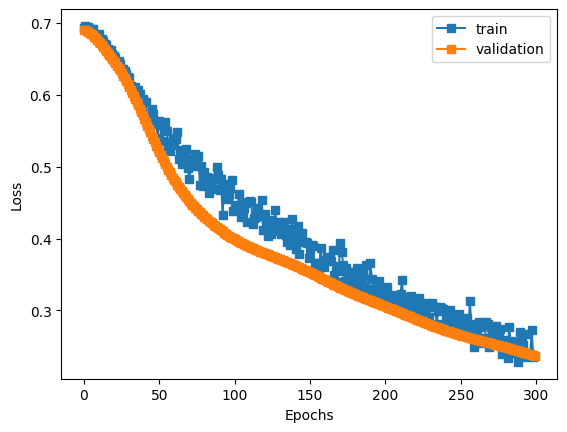

In [13]:
# Taken from Concordia COMP 432 Lab 5 on Debugging PyTorch
# Source: https://colab.research.google.com/drive/1_CaBwPTjCJPrH5ZZ6uA86v6FzFKu8anP?usp=share_link
plt.plot(train_loss, '-s', label='train')
plt.plot(validation_loss, '-s', label='validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

##### **MLP Results**

---------------  Confusion Matrix (Training and Test set) ---------------


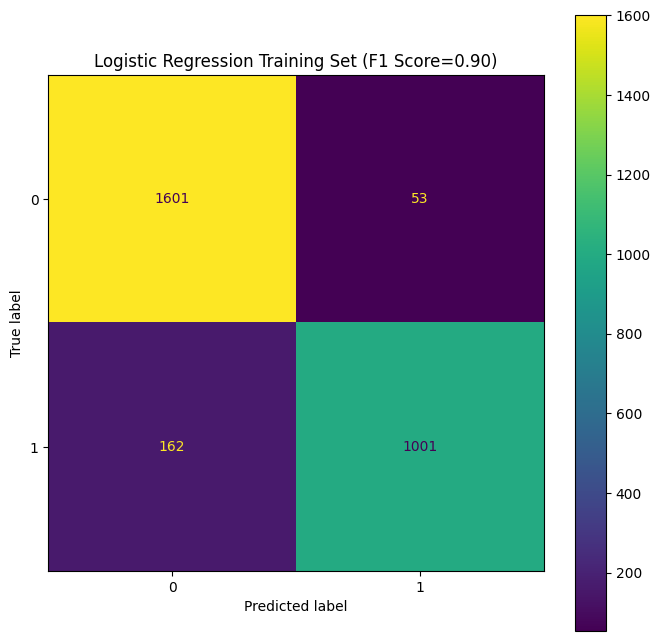

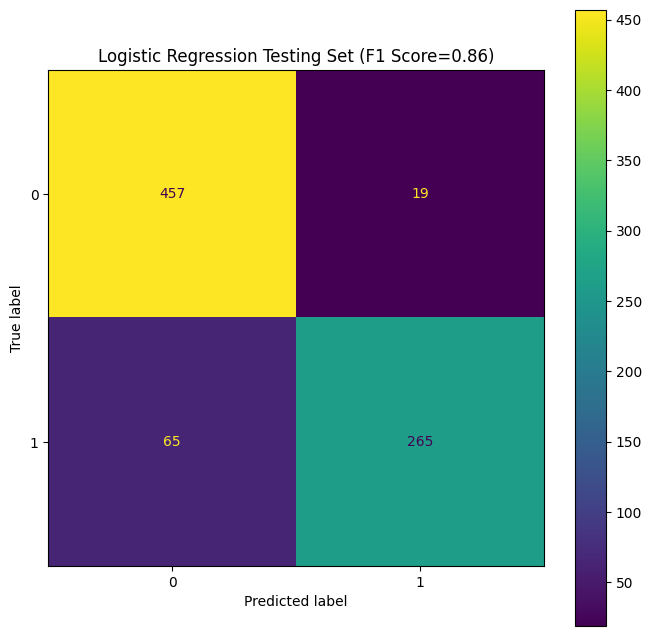

Train_loss: 0.1897 
Test_loss: 0.2350 


In [14]:
mlp.eval()

predictions_train = mlp(X_train.to(torch.float32).reshape(-1, image_dimension0*image_dimension1))
predictions_train = (predictions_train > 0.5).int().to(torch.int32).cpu().detach().numpy()
predictions_test = mlp(X_test.to(torch.float32).reshape(-1, image_dimension0*image_dimension1))
predictions_test = (predictions_test > 0.5).int().to(torch.int32).cpu().detach().numpy()
y_train = y_train.cpu().detach().numpy()
y_test = y_test.cpu().detach().numpy()

# Evaluate the model
print("---------------  Confusion Matrix (Training and Test set) ---------------")
display_confusion_matrix(y_train, predictions_train, "Logistic Regression Training Set (F1 Score=%.2f)" % sklearn.metrics.f1_score(y_train, predictions_train))
display_confusion_matrix(y_test, predictions_test, "Logistic Regression Testing Set (F1 Score=%.2f)" % sklearn.metrics.f1_score(y_test, predictions_test))


y_train = torch.from_numpy(y_train).to(device)
y_test = torch.from_numpy(y_test).to(device)

print("Train_loss: %.4f " % (loss(mlp(X_train.to(torch.float32).reshape(-1, image_dimension0*image_dimension1)).squeeze(), y_train.to(torch.float32))))
print("Test_loss: %.4f " % (loss(mlp(X_test.to(torch.float32).reshape(-1, image_dimension0*image_dimension1)).squeeze(), y_test.to(torch.float32))))

#### **Results Discussion**

It appears that an MLP can achieve an F1 score of 0.86 on unseen data and Logistic Regression can achieve an F1 score of 0.79 on the same unseen data. The AlexNet CNN from Kaggle users and this experiment's MLP yield similar results during testing. However, the CNN does a lot better on false negatives.

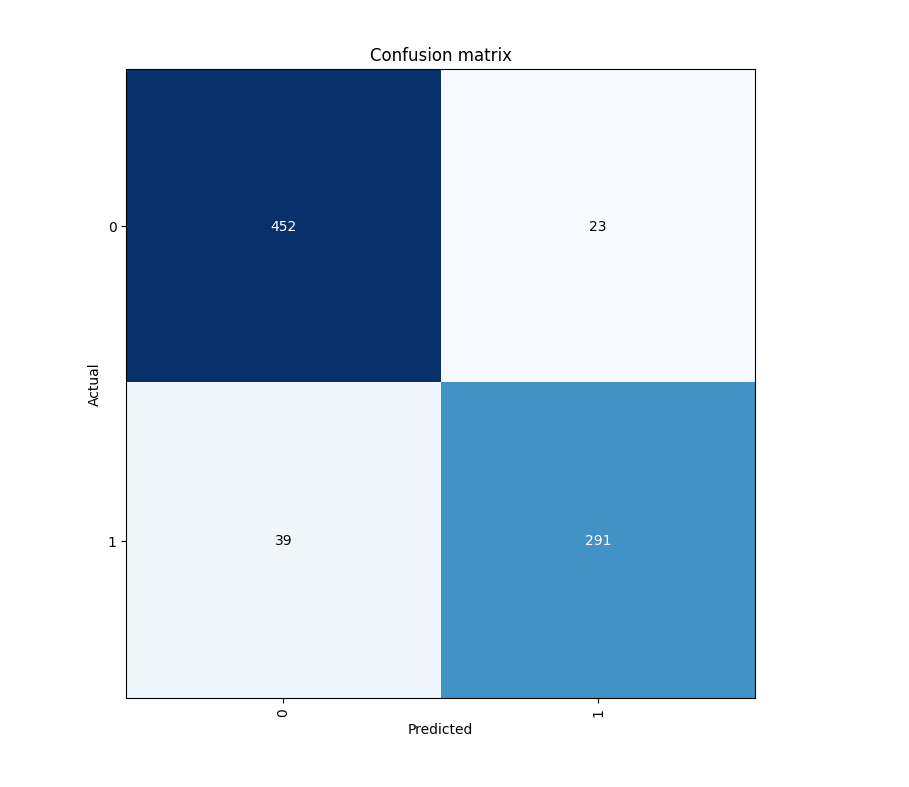

Figure 6: Confution Matrix on Test Data Using FastAIs pre-trained AlexNet CNN by Salim Benhamadi on Kaggle [1]

Ranking the aforementionned machine learning model from best to worse, AlexNet CNN is first, MLP is second and Logistic Regression is last.

## **Conclusions**

Neural networks like MLPs and CNNs seem to be better at binary classification on images than some models like logistic regression. Among many reasons, this could be attributed by the fact that neural networks have the potential to learn hierarchical patterns and even local patterns. So, the analysis of neural networks and logistic regression in this case is unfair. However, comparing MLPs and CNNs is fair. It was found that an MLP can yield similar results to a CNNs for pothole detection in an image without the additional hyperparameters. Although, the optimal MLP did worse in terms of false negatives.

Some phenomenons are left unexplained from this experiment. Namely, the effects of the number of hidden layers and test performance. For instance, in the inception of an optimal MLP, it was found that increasing the hidden layers was detrimental to performance. One hypothesis was that the model was learning some undesirable pattern. Although, this remains to be proven.

Also, many machine learning "best practices" were overlooked due to time constraint (e.g., balancing data, proper hyperparameter tuning by means of K-fold CV and more). However, many good practices were respected. For instance, ensuring that there are no data leakage by summing the confusion matrix elements since the train, validation and test set should contain 2817, 403 and 806 images respectively. Another example would be shuffling train data when doing SGD.

## **References**
[1] *MIIA Pothole Image Classification Challenge*, Kaggle, 2021. [Online]. Available: https://www.kaggle.com/datasets/salimhammadi07/miia-pothole-image-classification-challenge (accessed Apr. 19, 2023).

[2] *Dropout*, PyTorch. [Online]. Available: https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html (accessed Apr. 19, 2023).

[3] cswangjiawei and ptrblck. *“torch.nn.Dropout(p=0.5, inplace=False).”* PyTorch. [Online].
https://discuss.pytorch.org/t/torch-nn-dropout-p-0-5-inplace-false/27478/1 (accessed Apr. 19, 2023).

[4] *Universal approximation theorem*, Wikipedia. [Online]. Available: https://en.wikipedia.org/wiki/Universal_approximation_theorem (accessed Apr. 19, 2023).